
# Looking  at Trends

Finalizing how to represent trends for our MVP. I'm looking to draw specific slopes that will ultimately be positive or negative enough to be useful in predicting the change 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

dfAfrica = pd.read_csv("datasets/africa.csv")
dfAmericas = pd.read_csv("datasets/americas.csv")
dfEMed = pd.read_csv("datasets/mediterranean.csv")
dfEurope = pd.read_csv("datasets/europe.csv")
dfSEAsia = pd.read_csv("datasets/asia.csv")
dfWPacific = pd.read_csv("datasets/pacific.csv")

df = [dfAfrica, dfAmericas, dfEMed, dfEurope, dfSEAsia, dfWPacific]

result = pd.concat(df)

/Users/philip/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
def cleanData(data):
    data.AGEGROUP.replace(("AGE100PLUS", "AGE95-99", "AGE90-94", "AGE85-89", 
                             "AGE80-84", "AGE75-79", "AGE70-74", "AGE65-69", 
                             "AGE60-64", "AGE55-59", "AGE50-54", "AGE45-49", 
                             "AGE40-44", "AGE35-39", "AGE30-34", "AGE25-29", 
                             "AGE20-24", "AGE15-19", "AGE10-14", "AGE5-9", 
                             "AGE1-4", "AGELT1"), 
                          (100.0, 95.0, 90.0, 85.0, 80.0, 75.0, 70.0, 65.0, 60.0, 55.0, 50.0, 
                             45.0, 40.0, 35.0, 30.0, 25.0, 20.0, 15.0, 10.0, 5.0, 1.0, 0.5), 
                          inplace = True)
    
    data.SEX.replace(("BTSX", "FMLE", "MLE"), (2, 1, 0), inplace = True)
    
    # V not a continuous value, just for ease of referencing this column
    data.GHO.replace(("LIFE_0000000029", "LIFE_0000000030", "LIFE_0000000031", 
                      "LIFE_0000000032", "LIFE_0000000033", "LIFE_0000000034",
                      "LIFE_0000000035"),
                     (29, 30, 31, 32, 33, 34, 35), inplace = True)
    
    data.drop(["PUBLISHSTATE", "Low", "High", "Comments", "Display Value"], 
              inplace = True, axis = 1)
    return data

In [3]:
cleans = cleanData(result)

Now that we've cleaned everything and have it ready to go, I want to generate a 2D representation for life expectancy across age groups. To test I'm going to set up A couple short graphs to draw lines of best fit. I realized from my last, 3D representation that there was just too much going on for the visuals to be quickly understood. My ultimate goal here is to make something that is easily interpretable and still informs the viewer. Right now, I'm thinking that this could "Change the World" by raising awareness of the unequal living conditions around the world (this should be reflected in life expectancy)

In [4]:
def regionSeparate(region,cat,age):
    #select category values
    lifeExpec=result[result.GHO==cat]
    #filter for region
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    # only looking at both sexes life expectancy
    bSexLE= regionOnly[regionOnly.SEX == 2]
    #filter by age groups 
    agefilt = bSexLE[bSexLE.AGEGROUP== age]
    agefilt.sort_index(by = ["YEAR"], ascending = True, inplace = True)
    return agefilt

In [5]:
cat =35
age =0.5
afdf = regionSeparate('AFR',cat,age)
amdf = regionSeparate('AMR',cat,age)
emdf = regionSeparate('EMR',cat,age) #Eastern Mediterranean
eudf = regionSeparate('EUR',cat,age) # europe
wpdf = regionSeparate('WPR',cat,age) #Western Pacific
seadf = regionSeparate('SEAR',cat,age) #South-East Asia

/Users/philip/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
/Users/philip/anaconda2/lib/python2.7/site-packages/pandas/core/frame.py:3179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return self.sort_values(by, axis=axis, ascending=ascending, inplace=inplace)


In [6]:
#put in year, numeric value 
def scattersPlots(age,title,africadf,americadf,emeddf,eurodf,wpacifdf,seasiadf):
    fig = plt.figure()
    ax1=fig.add_subplot(111)

    ax1.scatter(africadf.YEAR.values,africadf.Numeric.values, c='b', label ='Africa')
    ax1.scatter(americadf.YEAR.values, americadf.Numeric.values, c= 'r', label = 'Americas')
    ax1.scatter(emeddf.YEAR.values, emeddf.Numeric.values, c= 'y', label = 'E Mediterranean')
    ax1.scatter(eurodf.YEAR.values, eurodf.Numeric.values, c= 'c', label = 'Europe')
    ax1.scatter(wpacifdf.YEAR.values, wpacifdf.Numeric.values, c= 'g', label = 'W Pacific')
    ax1.scatter(seasiadf.YEAR.values, seasiadf.Numeric.values, c= 'm', label = 'SE Asia')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

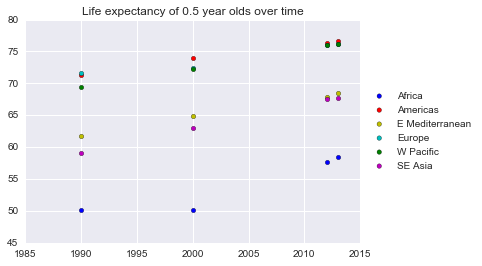

In [7]:
scattersPlots(age, 'Life expectancy of '+ str(age)+' year olds over time',afdf,amdf,emdf,eudf,wpdf,seadf)

I'm noticing that no matter the age group, most countries are generally increasing in life expectancy and also regions tend to follow the same dispersion/ranking. Africa is always at the bottom, for example. I want to look at other categories and see if there are more change-ups

In [8]:
#put in year, numeric value 
def manyPlots(age,title,africadf,americadf,emeddf,eurodf,wpacifdf,seasiadf):
    fig = plt.figure()
    ax1=fig.add_subplot(111)

    ax1.plot(africadf.YEAR.values,africadf.Numeric.values, c='b', label ='Africa')
    ax1.plot(americadf.YEAR.values, americadf.Numeric.values, c= 'r', label = 'Americas')
    ax1.plot(emeddf.YEAR.values, emeddf.Numeric.values, c= 'y', label = 'E Mediterranean')
    ax1.plot(eurodf.YEAR.values, eurodf.Numeric.values, c= 'c', label = 'Europe')
    ax1.plot(wpacifdf.YEAR.values, wpacifdf.Numeric.values, c= 'g', label = 'W Pacific')
    ax1.plot(seasiadf.YEAR.values, seasiadf.Numeric.values, c= 'm', label = 'SE Asia')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.title(title)
    plt.show()

In [9]:
def multiplots(cate,age, title):
    afdf = regionSeparate('AFR',cate,age)
    amdf = regionSeparate('AMR',cate,age)#america
    emdf = regionSeparate('EMR',cate,age) #Eastern Mediterranean
    eudf = regionSeparate('EUR',cate,age) # europe
    wpdf = regionSeparate('WPR',cate,age) #Western Pacific
    seadf = regionSeparate('SEAR',cate,age) #South-East Asia
    manyPlots(age, title, afdf,amdf,emdf,eudf,wpdf,seadf)

/Users/philip/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


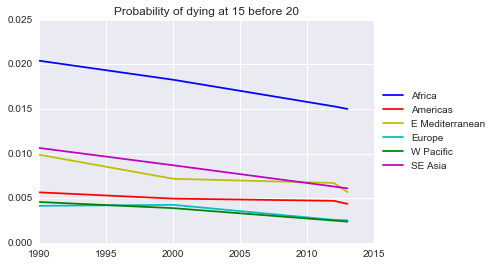

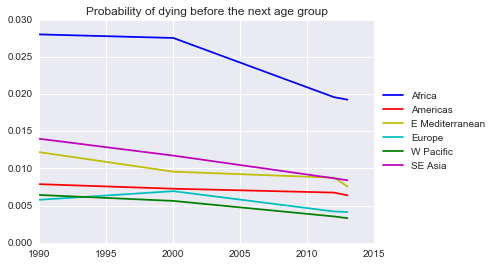

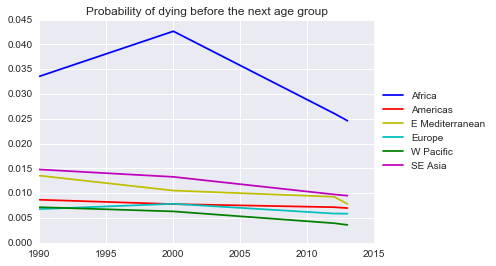

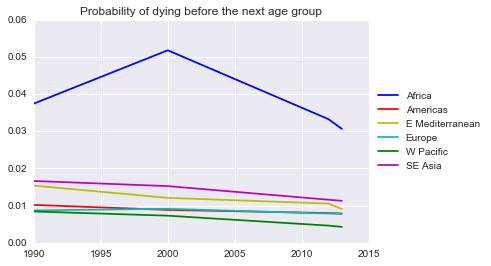

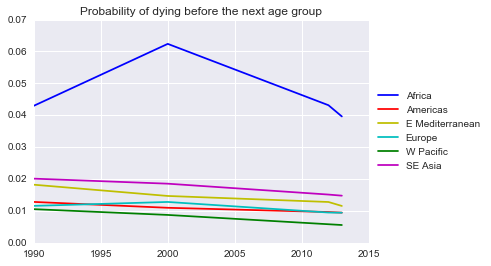

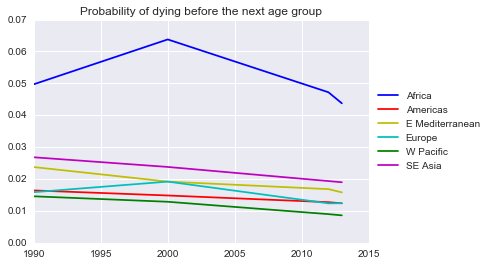

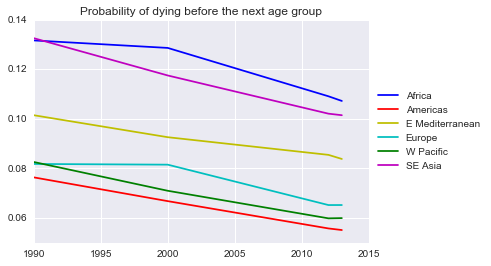

In [10]:
multiplots(30,15,'Probability of dying at 15 before 20')
multiplots(30,20,'Probability of dying before the next age group')
multiplots(30,25,'Probability of dying before the next age group')
multiplots(30,30,'Probability of dying before the next age group')
multiplots(30,35,'Probability of dying before the next age group')
multiplots(30,40,'Probability of dying before the next age group')
multiplots(30,60,'Probability of dying before the next age group')

Probability of dying before the next age group is much more interesting and looks to vary more here than in other categories. I see switching between europe and america as regions where you are less likely to die in the next five years. It could even be interesting to use this information to determine at which age in a given region at a given year a person is most likely to die. So next I'm going to restructure the data to stay on a single region and year and graph age groups on the x axis and probability of dying on the y axis. 

In [11]:
def yearRegionSelect(region,cat,year):
    #select category values
    lifeExpec=result[cleans.GHO==cat]

    #filter for region
    regionOnly = lifeExpec[lifeExpec.REGION==region]
    # only looking at both sexes right now
    bSexLE= regionOnly[regionOnly.SEX == 2]
    #filter by age groups 
    yearfilt = bSexLE[bSexLE.YEAR== year]
    yearfilt.sort_index(by = ["AGEGROUP"], ascending = True, inplace = True)
    return yearfilt

In [12]:
yrAfDf = yearRegionSelect('AFR', 30, 2000)
print yrAfDf.head()

      GHO  YEAR REGION  AGEGROUP  SEX  Numeric
680    30  2000    AFR       0.5    2  0.09353
1713   30  2000    AFR       1.0    2  0.06596
899    30  2000    AFR       5.0    2  0.02934
384    30  2000    AFR      10.0    2  0.01549
488    30  2000    AFR      15.0    2  0.01826


/Users/philip/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)


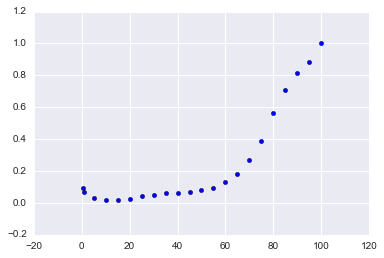

In [13]:
plt.scatter(yrAfDf.AGEGROUP.values,yrAfDf.Numeric.values)